# Difracción de Fresnel por una rendija

Buscaremos simular la acción de la luz en una rendija simple y mostrar el patrón generado. Asi mismo usaremos aproximación paraxial, Fresnel y criterio N-S.

In [1]:
import numpy as np
import pylab as plt

El muestreo que se usará será de 1.4e-02 mm
El espacio coordenado va de -0.40 mm hasta 0.40 mm


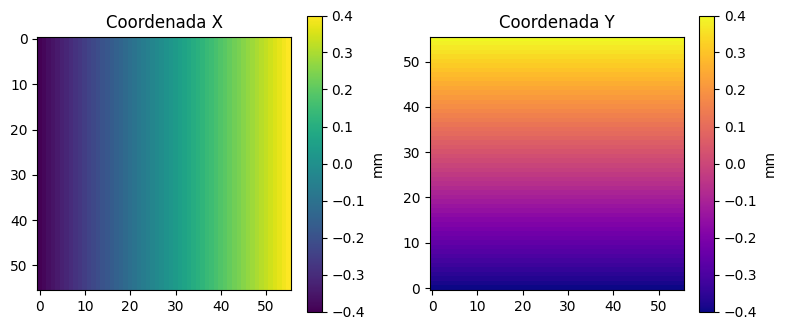

In [2]:
# Parámetros
L = 0.8       # Tamaño del objeto en mm
N = 56        # Tamaño de la matriz cuadrada (lado)
wl = 633e-6   # Longitud de onda en mm
dx = L / N    # Muestreo en el sistema coordenado, unidades en mm

# Creación del espacio coordenado usando linspace
x = np.linspace(-N * dx / 2, N * dx / 2, N)

# Información de interés
print(f'El muestreo que se usará será de {dx:.1e} mm')
print(f'El espacio coordenado va de {np.min(x):.2f} mm hasta {np.max(x):.2f} mm')

# Definición de función para construir marco de ceros
def marco(cuadro, factor=2, tipo='marco'):
    N = cuadro.shape[0]
    if tipo == 'marco':
        PE = np.zeros((factor * N, factor * N), dtype=cuadro.dtype)
        n = (factor * N - N) // 2
        PE[n:n+N, n:n+N] = cuadro
    elif tipo == 'cuadro':
        n = (N - N // factor) // 2
        PE = cuadro[n:n + N // factor, n:n + N // factor]
    return (PE)

# Espacio coordenado bidimensional
X, Y = np.meshgrid(x, x)

# Visualización
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(X, cmap='viridis')
plt.title('Coordenada X')
plt.colorbar(label='mm', shrink=0.8)

plt.subplot(122)
plt.imshow(Y, origin='lower', cmap='plasma')
plt.title('Coordenada Y')
plt.colorbar(label='mm', shrink=0.8)

plt.tight_layout()
plt.show()


Recordemos que el criterio de zonas de Fresnel: distancia mínima de propagación es:

$$N_{zf} = \frac{L^2}{\lambda z}$$

donde $N_{zf}$ es en número de zonas de Fresnel, $L$ es el ancho del objeto difractor, $\lambda$ es la longitud de onda, y $z$ es la distancia de propagación.

Se acepta que la aproximación de Fresnel es válida hasta un $N_{zf}=30$, por lo que la distancia mínima que podremos propagar será

$$z_{min} = \frac{L^2}{30\lambda}$$

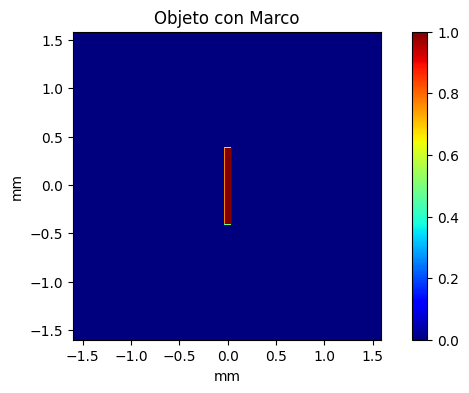

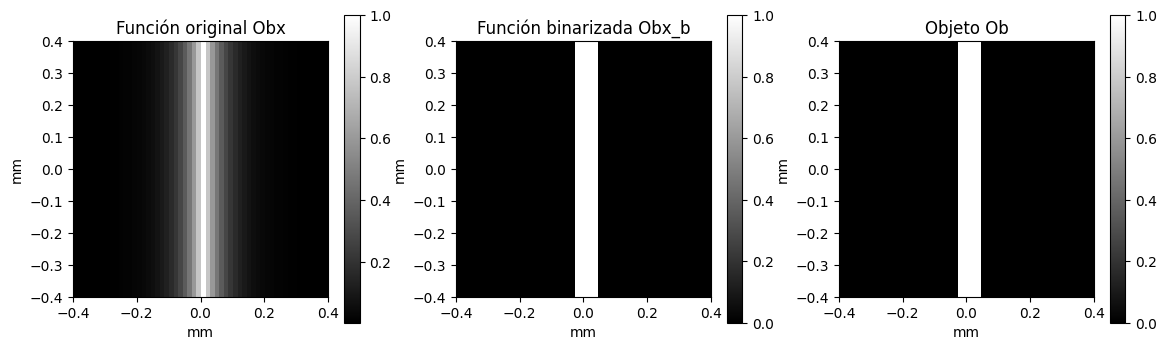

Por la aproximación paraxial y parabólica, la distancia mínima a propagar es 0.3 mm


In [3]:
# Espacio coordenado (X, Y)
L = 0.8  # Tamaño del objeto en mm
N = 56   # Tamaño de la matriz cuadrada (lado)
wl = 633e-6   # Longitud de onda en mm
dx = L / N    # muestreo en el sistema coordenado, unidades en mm
x = np.arange(-N * dx / 2, N * dx / 2, dx)
X, Y = np.meshgrid(x, x)

# Creación de la función objeto en X
Obx = np.exp(-abs(18 * X))  # Función exponencial en X

# Binarización de la función objeto
Obx_b = np.copy(Obx)  # Copia del arreglo original
Obx_b[Obx_b <= 0.5] = 0  # Asignar 0 a valores <= 0.5
Obx_b[Obx_b > 0.5] = 1   # Asignar 1 a valores > 0.5
Ob = Obx_b  # Función en X y Y binarizada

# Incremento para el marco
incre = 4  # Factor de incremento
PE = marco(Ob, factor=incre)  # Creación del marco ampliado
e = (-incre * N * dx / 2, incre * N * dx / 2 - dx, -incre * N * dx / 2, incre * N * dx / 2 - dx)

# Graficación del objeto con marco
plt.figure(figsize=(8, 4))
plt.imshow(PE, cmap='jet', extent=e, origin='lower')
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar()
plt.title('Objeto con Marco')
plt.show()

# Graficación de las diferentes etapas: función original, binarizada y con marco
plt.figure(figsize=(14, 8))

# Gráfico 1: Función original Obx
plt.subplot(131)
im1 = plt.imshow(Obx, cmap='gray', origin='lower', extent=(-L/2, L/2, -L/2, L/2))
plt.ylabel('mm')
plt.xlabel('mm')
plt.colorbar(im1, shrink=0.5)
plt.title('Función original Obx')

# Gráfico 2: Función binarizada Obx_b
plt.subplot(132)
im2 = plt.imshow(Obx_b, cmap='gray', origin='lower', extent=(-L/2, L/2, -L/2, L/2))
plt.ylabel('mm')
plt.xlabel('mm')
plt.colorbar(im2, shrink=0.5)
plt.title('Función binarizada Obx_b')

# Gráfico 3: Objeto binarizado Ob
plt.subplot(133)
im3 = plt.imshow(Ob, cmap='gray', origin='lower', extent=(-L/2, L/2, -L/2, L/2))
plt.ylabel('mm')
plt.xlabel('mm')
plt.colorbar(im3, shrink=0.5)
plt.title('Objeto Ob')

plt.show()

# Cálculo del criterio de Fresnel
difractor = L / 10  # En el caso de que el objeto difractor sea menor que el lado L
distancia_fresnel = difractor ** 2 / wl / 30
print(f'Por la aproximación paraxial y parabólica, la distancia mínima a propagar es {distancia_fresnel:.1f} mm')


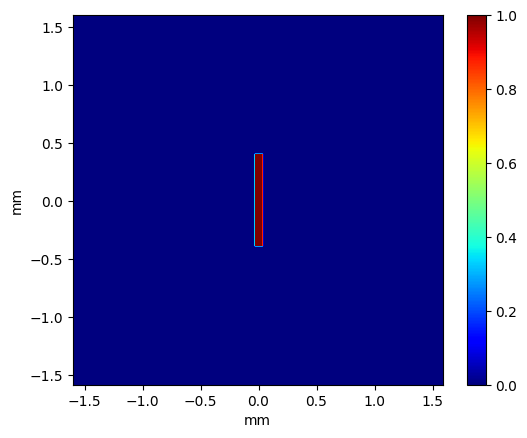

El teoremoa de Nyquist-Shannon nos dice que la distancia máxima que podemos propagar el campo será 72.2 mm


In [4]:
# Definición de función para construir marco de ceros

#def trasla(cuadro,factor=2,centrox=1/2,centroy=1/2):
def trasla(cuadro,factor=incre,centrox=1/2,centroy=1/2):
  # cuadro: arreglo a enmarcar, factor: tamaño relativo del marco (debe ser mayor o igual a 1)
    N = len(cuadro)
    PE = np.zeros((factor*N,factor*N))
    PE[int(factor*N*centroy-N/2):int(factor*N*centroy+N/2),int(factor*N*centrox-N/2):int(factor*N*centrox+N/2)] = cuadro
    return (PE)
### Usando la funcion traslada

#PE = marco(Ob,factor=incre)   # creación del marco

traslada = 1/2 #7/8
PE = trasla(Ob,factor=incre,centrox=traslada)
e=(-incre*N*dx/2,incre*N*dx/2-dx,-incre*N*dx/2,incre*N*dx/2-dx)

# Graficación
plt.figure()
plt.imshow(PE,cmap='jet',extent=(-incre*N*dx/2,incre*N*dx/2-dx,-incre*N*dx/2 + dx,incre*N*dx/2),origin='lower')
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar()
plt.show()

print('El teoremoa de Nyquist-Shannon nos dice que la distancia máxima que podemos propagar el campo será %.1f mm' % (incre*N*dx**2/wl))


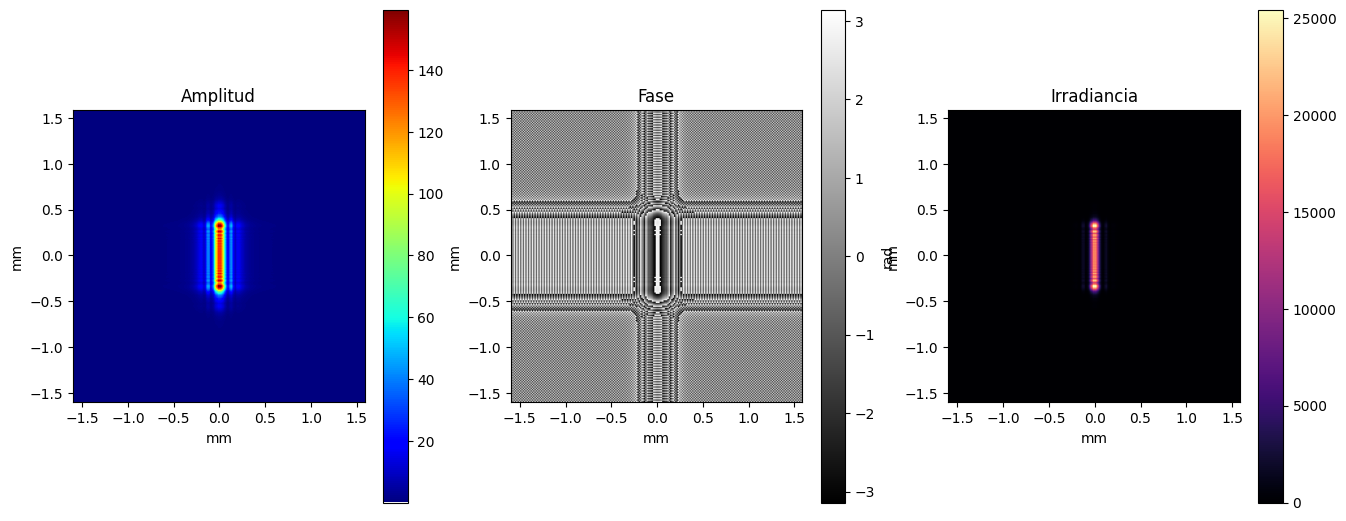

In [9]:
def propaTF(u1,wl,z,dx):
  k = 2*np.pi/wl
  tam = len(u1)
  df = 1/(tam*dx)
  f = np.arange(-tam*df/2,tam*df/2,df)
  Fx , Fy = np.meshgrid(f,f)
  H = np.exp(-1j*np.pi*wl*z*(Fx**2 + Fy**2))
  U1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(u1)))
  return (1/(1j*wl*z))*np.exp(1j*k*z)*np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(U1*H)))

z = 10
PS = propaTF(PE,wl,z,dx)

zoom = 1
factor = 1/zoom
df = 1/(incre*N*dx)
PS2 = marco(PS,factor=int(1/zoom),tipo='cuadro')
# Graficación
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.title('Amplitud')
plt.imshow(abs(PS2),cmap='jet',extent=(-factor*incre*N*dx/2,factor*incre*N*dx/2-dx,-factor*incre*N*dx/2,factor*incre*N*dx/2-dx),origin='lower')
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar(shrink=0.8)
plt.subplot(132)
plt.title('Fase')
plt.imshow(np.angle(PS2),cmap='gray',extent=(-factor*incre*N*dx/2,factor*incre*N*dx/2-dx,-factor*incre*N*dx/2,factor*incre*N*dx/2-dx),origin='lower')
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar(label='rad',shrink=0.8)
plt.subplot(133)
plt.title('Irradiancia')
plt.imshow(abs(PS2)**2,cmap='magma',extent=(-factor*incre*N*dx/2,factor*incre*N*dx/2-dx,-factor*incre*N*dx/2,factor*incre*N*dx/2-dx),origin='lower')
plt.xlabel('mm')
plt.ylabel('mm')
plt.colorbar(shrink=0.8)
plt.show()